# 1. Data Preparation¶

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import re
import sklearn

#ignore any warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1  = pd.read_csv("NCHS1.csv")
df2  = pd.read_csv("NCHS2.csv")
df3  = pd.read_csv("NCHS3.csv")
df4  = pd.read_csv("NCHS4.csv")
df5  = pd.read_csv("NCHS5.csv")

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

#merging all dataframes to have one complete dataframe(df)
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [3]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [4]:
#remove NaN's
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

#renaming some important features
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # NaN -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


### 1.1. VarianceThreshold

VarianceThreshold function just removes the columns and features that don't have much variance because, you're not going to get much predictive power out of them. For example; what if everyone is female? This feature is not going to add any predictive ability or power to your model, therefore there's no point to have it.

In [5]:
from sklearn.feature_selection import VarianceThreshold
#remove NaN's
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

#year in us -> american : 0, not american : >1
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

#fill with median
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

#use ffill to fill na under Family_income
df['Family_income'] = df['Family_income'].fillna(method='ffill')

#Breast_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

#remove all features with low variance which leaves us with the dataframe below
sel = VarianceThreshold(threshold=(0.15)) #variance lower than this threshold will be removed
sel.fit_transform(df)

df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


### 1.2. Specifying Target Column

GlycoHemoglobin is used to classify diabetes
- No diabetes: GlycoHemoglobin < 6
- Diabetes risk: 6 <= GlycoHemoglobin <= 6.4
- Diabetes: 6.5 <= GlycoHemoglobin

Therefore;

In [6]:
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2
df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0


In [7]:
#"GlycoHemoglobin" should be dropped because our target column will be "Diabetes"
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)

df.head()

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


### 1.3. Visualization

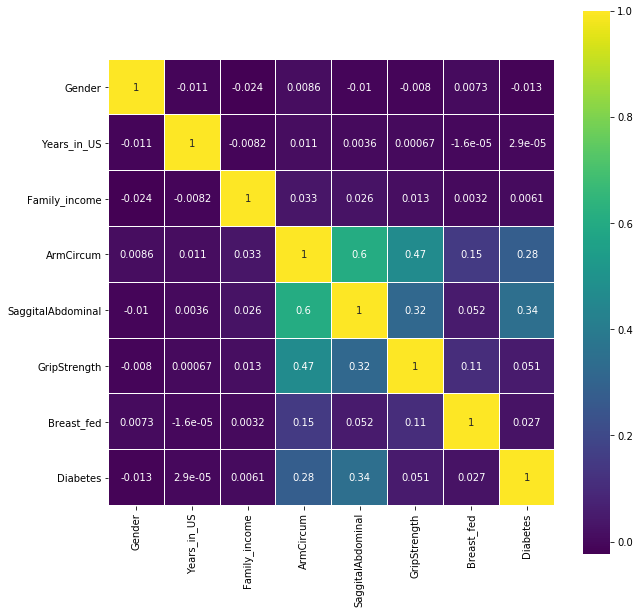

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

# 2. Creating Models

### 2.1. Split Train/Test

In [10]:
#data -> features, target -> diabetes
data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

#seperate training set and test set
train_X = data[:6000]
test_X = data[6000:]
train_Y = target[:6000]
test_Y = target[6000:]

### 2.1. AdaBoost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#create adaboost classification obj
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

#training via adaboost classficiation model
ab_clf.fit(train_X, train_Y)

#make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)

print('\nparms: \n', ab_clf.get_params)

#score
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))


parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                  

### 2.2. XGBoost

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(train_X, train_Y)

xgboost_score = xgboost.score(test_X, test_Y)
xgboost_score

0.8730658274324679

### 2.3. Bagging Decision Trees Classifiers

In [13]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_dt_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8704432205612379

### 2.4. Bagging KNeighbor Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5, 
                            bootstrap = False, bootstrap_features = False)

bagging.fit(train_X, train_Y)
bg_pred_diabetes = bagging.predict(test_X)

bg_score = bagging.score(test_X, test_Y)
bagging.score(test_X, test_Y)

0.8806713873590348

### 2.5. MLPClassifier

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

mlp.fit(train_X, train_Y)
mlp_pred_diabetes = mlp.predict(test_X)

print("parameter: ", mlp.get_params())

mlp_score = mlp.score(test_X, test_Y)
mlp.score(test_X, test_Y)

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0.8806713873590348

# 3. Comparing Performance of Models

In [16]:
d = {'Model': ['Adaboost', 'XGBoost', 'Bagging_decision tree based', 'Bagging_KNeighbors', 'MLP'],
     'accuracy' : [ab_clf_score, xgboost_score, bg_dt_score, bg_score, mlp_score]}

result_df = pd.DataFrame(data = d)
result_df = result_df.sort_values(by="accuracy", ascending=True)
result_df

,Model,accuracy
0,Adaboost,0.704170
2,Bagging_decision tree based,0.870443
1,XGBoost,0.873066
3,Bagging_KNeighbors,0.880671
4,MLP,0.880671


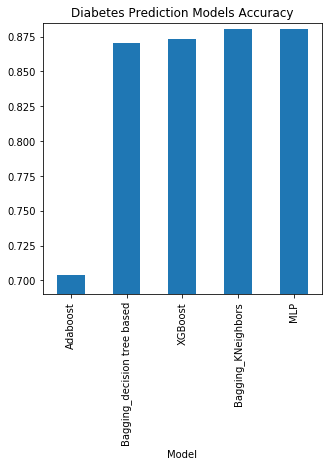

In [17]:
plot=result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(5, 5), title='Diabetes Prediction Models Accuracy', 
               sort_columns=True, legend=False).axis([None, None, 0.69, 0.885])